# Vis

In [1]:
from torchhk.vis import *

## Table of Contents

- [Base](#Base)
	- [Create Plot](#Create-Plot)
	- [Subplots](#Subplots)
- [Feature](#Feature)
	- [plot_scatter](#plot_scatter)
	- [plot_multi_scatter](#plot_multi_scatter)
	- [plot_dist](#plot_dist)
	- [plot_img](#plot_img)
	- [plot_pca](#plot_pca)
	- [plot_tsne](#plot_tsne)
- [Model](#Model)
	- [plot_logit_dist](#plot_logit_dist)
	- [plot_grad_dist](#plot_grad_dist)
	- [plot_decision_boundary](#plot_decision_boundary)
	- [plot_weight](#plot_weight)
	- [plot_individual_weight](#plot_individual_weight)
	- [plot_perturb](#plot_perturb)

## Base

### Create Plot

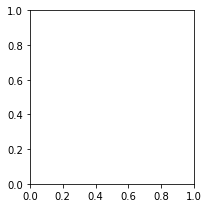

In [2]:
ax = init_plot(ax=None, figsize=(3,3), title="", xlabel="", ylabel="",
               xlim=None, ylim=None, pad_ratio=0, show_axis=True, tight=True)

### Subplots

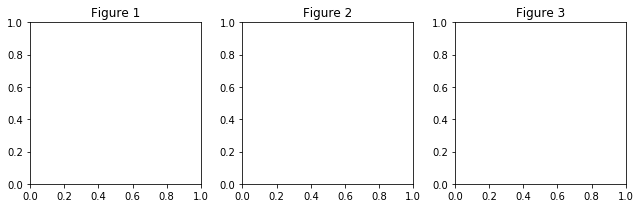

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(9,3))
ax1 = init_plot(ax=ax[0], title="Figure 1")
ax2 = init_plot(ax=ax[1], title="Figure 2")
ax3 = init_plot(ax=ax[2], title="Figure 3")

## Feature

### plot_scatter

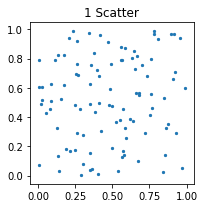

In [4]:
ax = init_plot(figsize=(3,3), title="1 Scatter")
plot_scatter(ax, torch.rand(100, 2))

### plot_multi_scatter

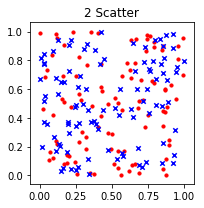

In [5]:
ax = init_plot(figsize=(3,3), title="2 Scatter")
plot_scatter(ax, torch.rand(100, 2), color='red', marker='o', marker_size=10)
plot_scatter(ax, torch.rand(100, 2), color='blue', marker='x', marker_size=20)

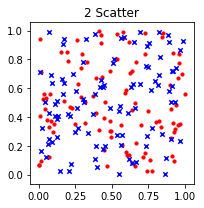

In [6]:
ax = init_plot(figsize=(3,3), title="2 Scatter")
plot_multi_scatter(ax, [torch.rand(100, 2), torch.rand(100, 2)],
                   colors=['red', 'blue'], markers=['o', 'x'], marker_sizes=[10,20])

### plot_dist

- Stats
Max : 0.988328
Min : 0.006063
Mean : 0.505370
Median : 0.558285


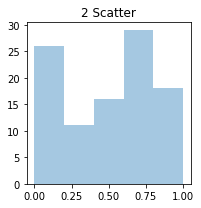

In [7]:
ax = init_plot(figsize=(3,3), title="2 Scatter")
plot_dist(ax, torch.rand(100), bins=[0, 0.2, 0.4, 0.6, 0.8, 1], stat=True, norm_hist=False)

### plot_img

In [8]:
from torchhk.datasets import *

In [9]:
data =Datasets(data_name="CIFAR10")
train_loader, test_loader = data.get_loader(batch_size=12)
train_images, _ = iter(train_loader).next()

Files already downloaded and verified
Files already downloaded and verified
Data Loaded!
Train Data Length : 50000
Test Data Length : 10000


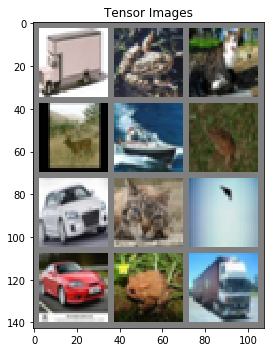

In [10]:
ax = init_plot(figsize=(5, 5), title="Tensor Images")
plot_img(ax, train_images, ncols=3, padding=3, pad_value=0.5)

### plot_pca

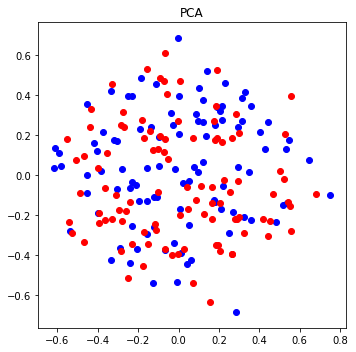

In [11]:
ax = init_plot(figsize=(5, 5), title="PCA")
plot_pca(ax, [torch.rand(100, 3), torch.rand(100, 3)], colors=['blue', 'red'])

### plot_tsne

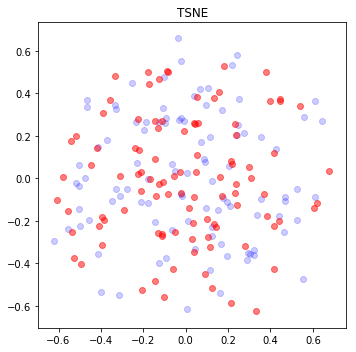

In [12]:
ax = init_plot(figsize=(5, 5), title="TSNE")
plot_pca(ax, [torch.rand(100, 3), torch.rand(100, 3)], colors=['blue', 'red'], alphas=[0.2, 0.5])

## Model

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [14]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv_layer = nn.Sequential(
            nn.Conv2d(1,32,5),
            nn.MaxPool2d(2,2),
            nn.ReLU(),
            nn.Conv2d(32,64,5),
            nn.MaxPool2d(2,2),
            nn.ReLU(),
            nn.Flatten()
        )
        
        self.fc_layer = nn.Sequential(
            nn.Linear(64*4*4, 100),
            nn.ReLU(),
            nn.Linear(100, 2),
            nn.ReLU(),
            nn.Linear(2, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )       
        
    def forward(self,x):
        out = self.conv_layer(x)
        out = self.fc_layer(out)

        return out

In [15]:
model = CNN().cuda()

In [16]:
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
num_epochs = 2 

In [17]:
data = Datasets(data_name="MNIST")
train_loader, test_loader = data.get_loader(batch_size=128)

Data Loaded!
Train Data Length : 60000
Test Data Length : 10000


In [18]:
for epoch in range(num_epochs):
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images.cuda()
        Y = batch_labels.cuda()

        pre = model(X)
        cost = loss(pre, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if (i+1) % 200 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_loader), cost.item()))

Epoch [1/2], lter [200/468], Loss: 0.3682
Epoch [1/2], lter [400/468], Loss: 0.2085
Epoch [2/2], lter [200/468], Loss: 0.1438
Epoch [2/2], lter [400/468], Loss: 0.4041


In [19]:
correct = 0
total = 0

for images, labels in test_loader:
    
    images = images.cuda()
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (predicted == labels.cuda()).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

Accuracy of test images: 95.180000 %


### plot_logit_dist

- Stats
Max : 76.172798
Min : -57.808464
Mean : 0.219457
Median : -0.242751


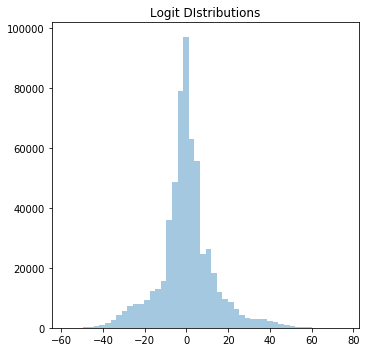

In [20]:
ax = init_plot(figsize=(5, 5), title="Logit DIstributions")
plot_logit_dist(ax, model, train_loader)

### plot_grad_dist

- Stats
Max : 0.228346
Min : -0.377700
Mean : -0.000003
Median : 0.000000


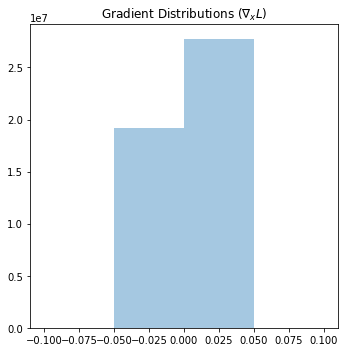

In [21]:
ax = init_plot(figsize=(5, 5), title=r"Gradient Distributions ($\nabla_x L$)")
plot_grad_dist(ax, model, train_loader, loss=nn.CrossEntropyLoss(), bins=[-0.1, -0.05, 0, 0.05, 0.1])

### plot_decision_boundary

In [22]:
class latent() :
    def __init__(self, model) :
        self.model = model
        
    def parameters(self) :
        return self.model.fc_layer[4:].parameters()
    
    def __call__(self, x) :
        out = self.model.fc_layer[4:](x)
        _, predicted = torch.max(out, 1)
        return predicted
        
latent_model = latent(model)

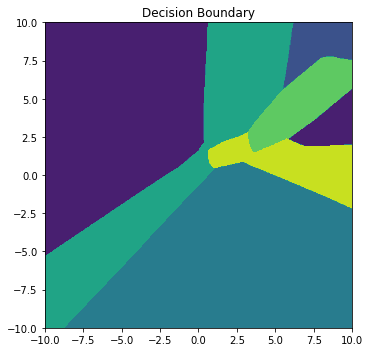

In [23]:
ax = init_plot(figsize=(5, 5), title="Decision Boundary")
plot_decision_boundary(ax, latent_model, xrange=(-10, 10), yrange=(-10, 10))

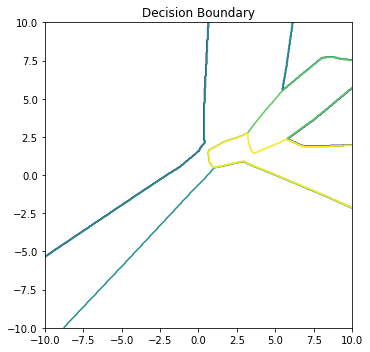

In [24]:
ax = init_plot(figsize=(5, 5), title="Decision Boundary")
plot_decision_boundary(ax, latent_model, xrange=(-10, 10), yrange=(-10, 10), as_line=True)

### plot_weight

In [25]:
def filter(name) :
    isWeight = "weight" in name
    return isWeight

- Stats
Max : 2.984758
Min : -1.549882
Mean : -0.011701
Median : -0.007734


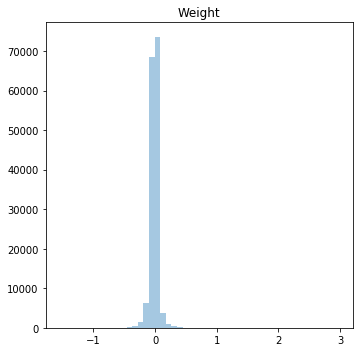

In [26]:
ax = init_plot(figsize=(5, 5), title="Weight")
plot_weight(ax, model, filter=filter)

### plot_individual_weight

In [27]:
def filter(name) :
    isWeight = "weight" in name
    isConv = "conv" in name
    return isWeight*isConv

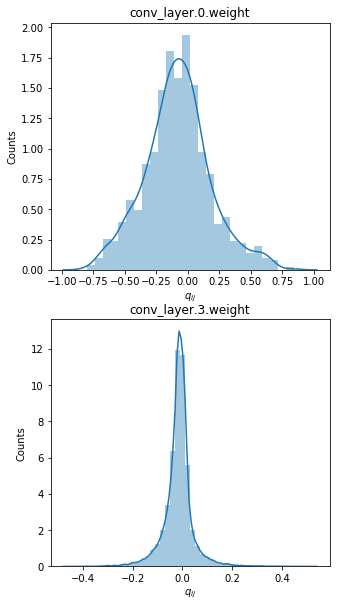

In [28]:
plot_individual_weight(model, ncols=1, filter=filter)

### plot_perturb